In [1]:
from regression import Regression
from feature_selection import FeatureSelection
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
y_test_predicted = Regression.linear_regression()
print(y_test_predicted)

[-2.00000000e-01  2.00000000e+00  2.70000000e+00 -3.00000000e-01
  7.00000000e-01 -3.00000000e-01  1.10000000e+00  2.70000000e+00
  8.00000000e-01 -1.00000000e-01  1.20000000e+00  7.40000000e+00
  7.00000000e-01  4.00000000e-01  1.10000000e+00 -2.00000000e-01
 -4.00000000e-01  1.00000000e-01  2.10000000e+00  1.19579013e-13
 -1.00000000e-01  3.30000000e+00  1.40000000e+00  1.20000000e+00
  2.70000000e+00 -2.00000000e-01  1.40000000e+00  1.90000000e+00
  2.00000000e-01  9.00000000e-01 -1.00000000e-01  1.60000000e+00
 -3.00000000e-01  1.00000000e-01  1.00000000e+00  7.00000000e-01
  3.00000000e-01 -1.00000000e-01  1.70000000e+00  1.20000000e+00
  2.00000000e-01  2.00000000e-01  1.00000000e-01  1.00000000e+00
  4.00000000e-01 -6.00000000e-01  1.50000000e+00  1.10000000e+00
  3.60000000e+00 -3.00000000e-01  9.00000000e-01 -6.00000000e-01
  1.57156965e-13 -3.00000000e-01  2.60000000e+00  2.50000000e+00
 -1.00000000e-01  1.30000000e+00 -4.00000000e-01  4.56197890e-14
  1.20000000e+00 -1.00000

In [3]:
new_features, new_dataset = FeatureSelection.select_features()
print(new_dataset)

[[ 1.9820000e+03  5.7900000e-01  0.0000000e+00 ...  4.8700000e+00
   4.3700000e+00  4.7000000e+00]
 [ 1.9820000e+03  4.9400000e-01  0.0000000e+00 ...  3.4500000e+00
   3.0500000e+00  3.4000000e+00]
 [ 1.9820000e+03  4.6500000e-01  3.5200000e-01 ... -4.4300000e+00
  -4.4800000e+00  1.0000000e+00]
 ...
 [ 2.0220000e+03  5.2600000e-01  9.1000000e-02 ...  4.4500000e+00
   4.2300000e+00  2.0000000e-01]
 [ 2.0220000e+03  5.6700000e-01  0.0000000e+00 ... -8.8800000e+00
  -8.5500000e+00  0.0000000e+00]
 [ 2.0220000e+03  6.2600000e-01  2.6668704e-01 ...  2.0000000e-02
   9.0000000e-02  1.3000000e+00]]


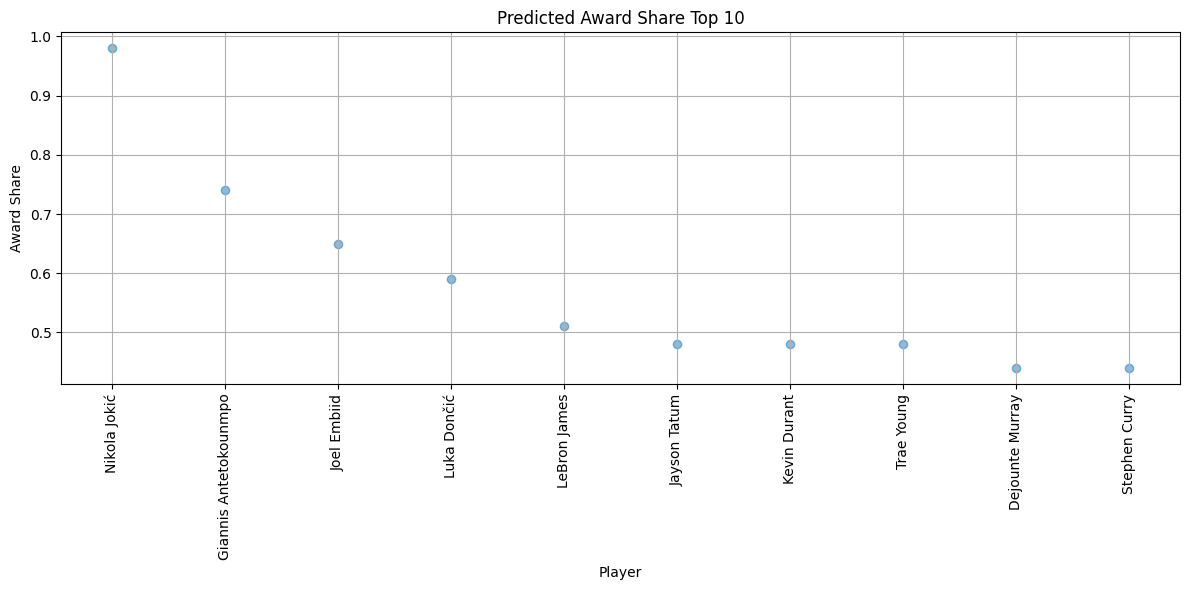

In [4]:
df = pd.read_csv('NBA_Dataset.csv')
df = df[df['mp_per_g'] >= 10]
df = df[df['season'] == 2022]

playerdf = df["player"]
ypredict = pd.DataFrame(y_test_predicted)
# print(ypredict)


newdf = pd.concat([playerdf.reset_index(drop=True), ypredict.reset_index(drop=True)], axis = 1, ignore_index=True)
# newdf = newdf[newdf[1] > 1]
newdf = newdf.nlargest(10, 1)
newdf[1] = newdf[1] / 10

plt.figure(figsize=(12, 6))  # Set the figure size
plt.scatter(newdf[0], newdf[1], alpha=0.5)  # Plot 'award_share' vs 'player'

# Set the title and labels
plt.title('Predicted Award Share Top 10')
plt.xlabel('Player')
plt.ylabel('Award Share')

# Rotate x-axis labels if they're lengthy to prevent overlap
plt.xticks(rotation=90)

# Show a grid for easier reading
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()



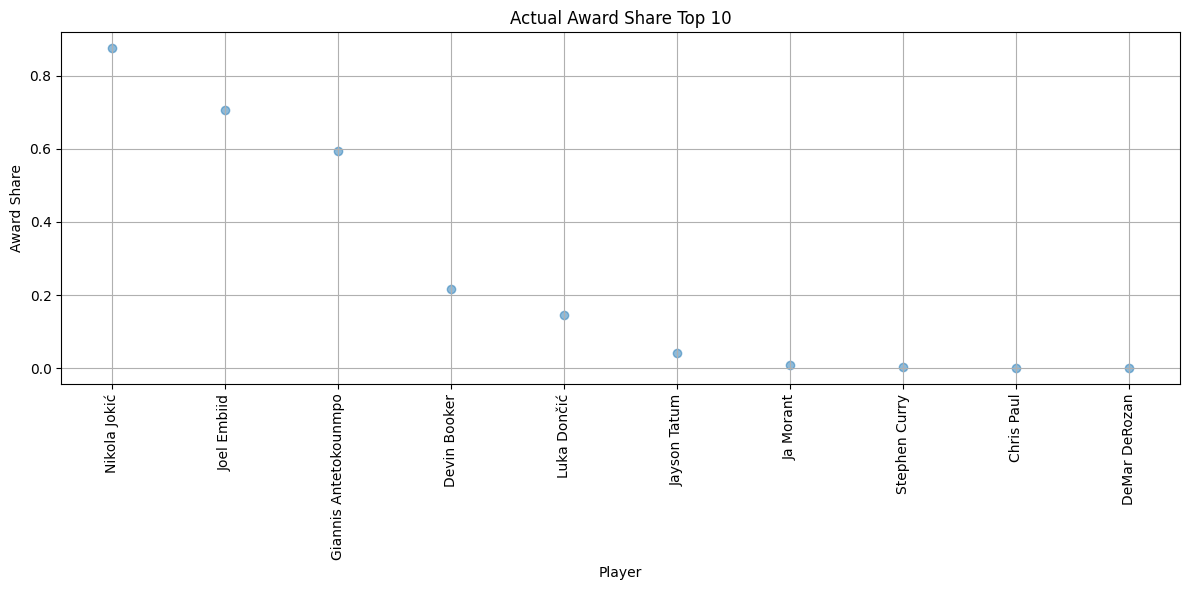

In [5]:
df = pd.read_csv('NBA_Dataset.csv')
df = df[df['mp_per_g'] >= 10]
df = df[df['season'] == 2022]
# df = df[df['award_share'] > 0]
df = df.nlargest(10, 'award_share')

plt.figure(figsize=(12, 6))  # Set the figure size
plt.scatter(df['player'], df['award_share'], alpha=0.5)  # Plot 'award_share' vs 'player'

# Set the title and labels
plt.title('Actual Award Share Top 10')
plt.xlabel('Player')
plt.ylabel('Award Share')

# Rotate x-axis labels if they're lengthy to prevent overlap
plt.xticks(rotation=90)

# Show a grid for easier reading
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()



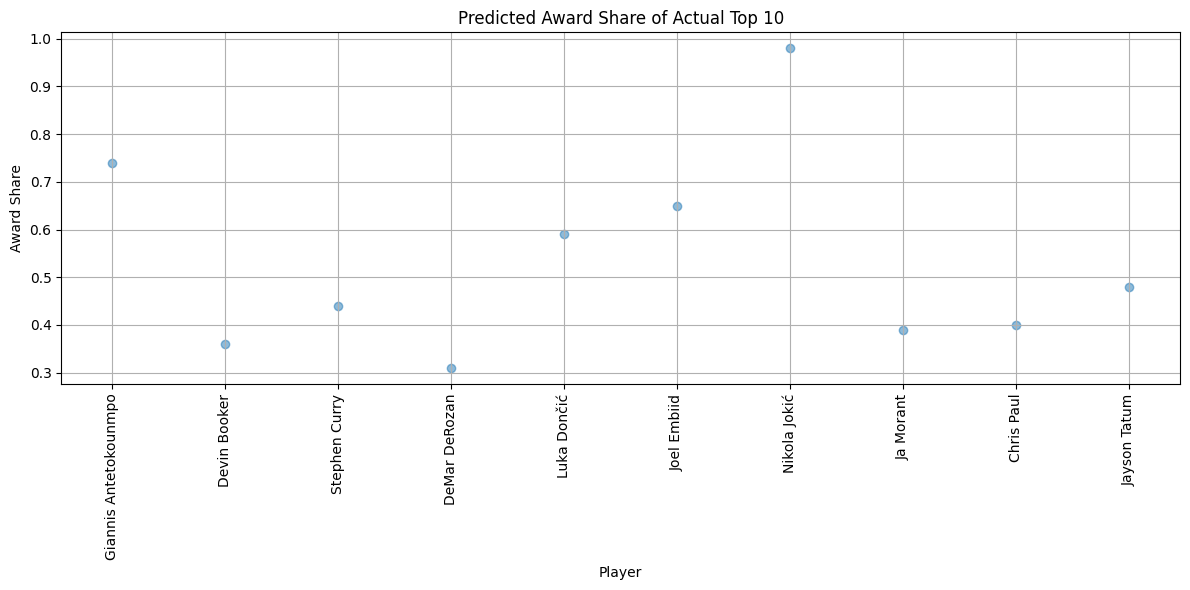

In [6]:
adf = pd.read_csv('NBA_Dataset.csv')
adf = adf[adf['mp_per_g'] >= 10]
adf = adf[adf['season'] == 2022]

playerdf = adf["player"]
ypredict = pd.DataFrame(y_test_predicted)
# print(ypredict)


newdf = pd.concat([playerdf.reset_index(drop=True), ypredict.reset_index(drop=True)], axis = 1, ignore_index=True)
newdf = newdf[newdf[0].isin(df['player'])]
# newdf = newdf[newdf[1] > 1]
# newdf = newdf.nlargest(10, 1)
newdf[1] = newdf[1] / 10


plt.figure(figsize=(12, 6))  # Set the figure size
plt.scatter(newdf[0], newdf[1], alpha=0.5)  # Plot 'award_share' vs 'player'

# Set the title and labels
plt.title('Predicted Award Share of Actual Top 10')
plt.xlabel('Player')
plt.ylabel('Award Share')

# Rotate x-axis labels if they're lengthy to prevent overlap
plt.xticks(rotation=90)

# Show a grid for easier reading
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()

In [7]:
import numpy as np
import pandas as pd

# Assuming df_actual has a column 'actual_value' and df_predicted has a column 'predicted_value'
# And both dataframes are aligned by players

# Calculating the squared differences
# print(df['award_share'])
# print(newdf[1])
df['award_share'] = pd.to_numeric(df['award_share'], errors='coerce')
newdf[1] = pd.to_numeric(newdf[1], errors='coerce')
df = df.reset_index()
newdf = newdf.reset_index()

# print(df['award_share'])

squared_differences = (df['award_share'] - newdf[1]) ** 2

print(squared_differences)

# Calculating the mean of these squared differences (MSE)
mse = squared_differences.mean()

# Calculating the RMSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)

0    0.018225
1    0.119716
2    0.024025
3    0.008836
4    0.197136
5    0.368449
6    0.940900
7    0.148996
8    0.158404
9    0.229441
dtype: float64
RMSE: 0.4705452156807155


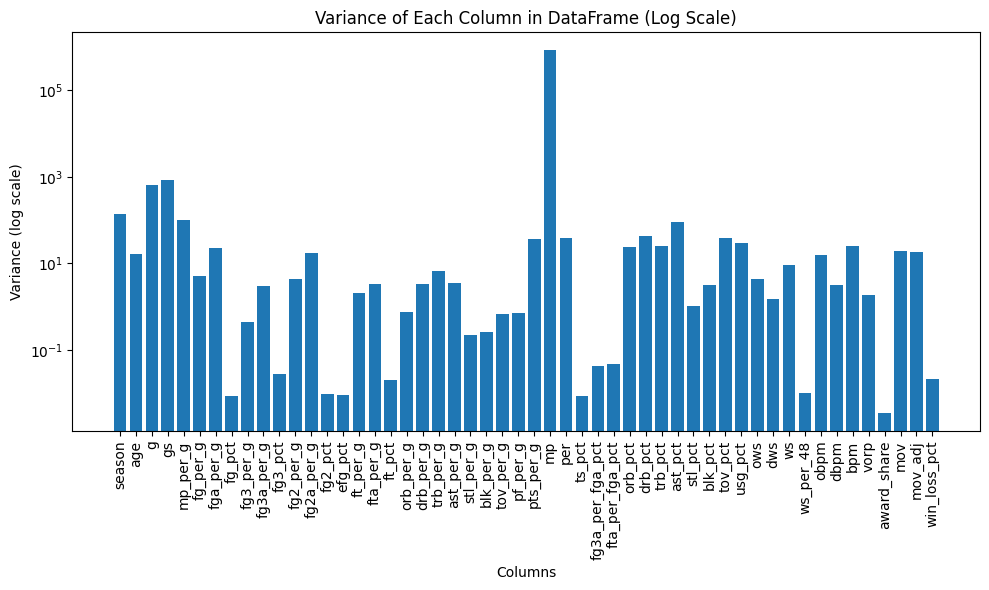

In [35]:
df = pd.read_csv('Dataset_Numbers_Only.csv')

variance = df.var()

# Plotting the variance
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.bar(variance.index, variance.values)  # Create a bar plot
plt.xlabel('Columns')  # Label for the x-axis
plt.ylabel('Variance (log scale)')  # Label for the y-axis
plt.title('Variance of Each Column in DataFrame (Log Scale)')  # Title of the plot
plt.xticks(rotation=90)  # Rotate x-axis labels if they're lengthy
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()  # Display the plot

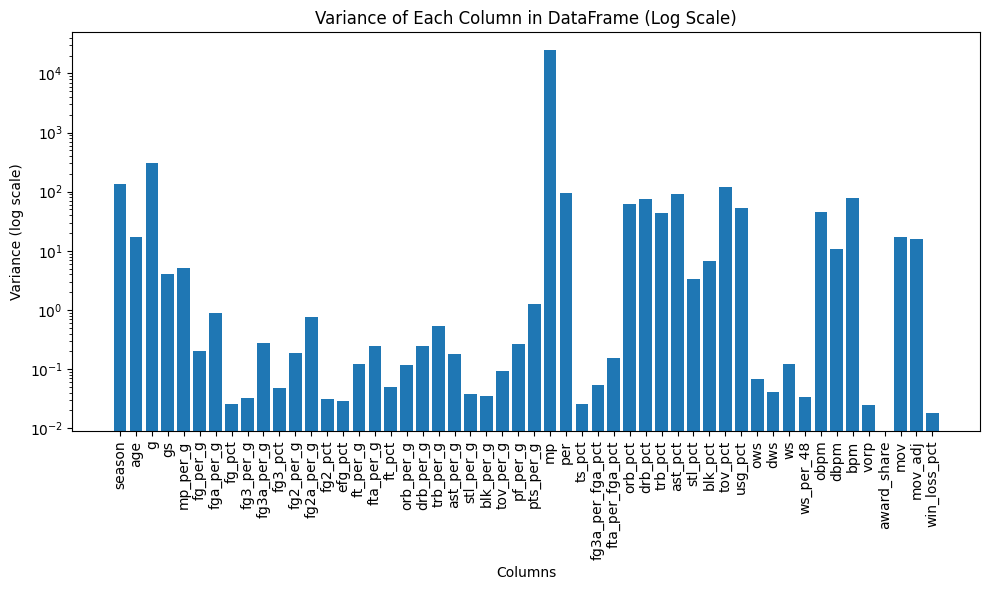

In [37]:
df = pd.read_csv('Dataset_Numbers_Only.csv')


variance = df.var()

# Plotting the variance
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.bar(variance.index, variance.values)  # Create a bar plot
plt.xlabel('Columns')  # Label for the x-axis
plt.ylabel('Variance (log scale)')  # Label for the y-axis
plt.title('Variance of Each Column in DataFrame (Log Scale)')  # Title of the plot
plt.xticks(rotation=90)  # Rotate x-axis labels if they're lengthy
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()  # Display the plot